In [2]:
import numpy as np
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

In [5]:
bench = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]
a1 = pdr.data.DataReader('LRCX', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]
a2 = pdr.data.DataReader('AAPL', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]

slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slra1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slra2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()

print(slr12.rsquared, slra1.rsquared, slra2.rsquared)

0.9392215160024342 0.8818449582549218 0.8888700311801089


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
bench = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2009,1,1), end=datetime(2015,1,1)).iloc[:, -1]
a1 = pdr.data.DataReader('LRCX', data_source='yahoo', start=datetime(2009,1,1), end=datetime(2015,1,1)).iloc[:, -1]
a2 = pdr.data.DataReader('AAPL', data_source='yahoo', start=datetime(2009,1,1), end=datetime(2015,1,1)).iloc[:, -1]

slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slra1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slra2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()

print(slr12.rsquared, slra1.rsquared, slra2.rsquared)

'rsquared value drops as we increase the time period for regression between lrcx and aapl'

0.6563171915226478 0.736587910807019 0.8856412590857602


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


'rsquared value drops as we increase the time period'

0.7897083168334177
0.9039206654254188


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


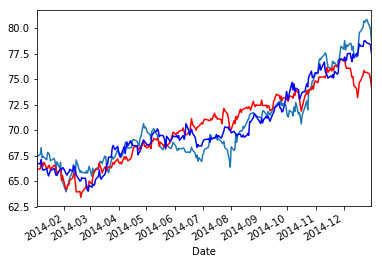

In [12]:
x1 = pdr.data.DataReader('PEP', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
x2 = pdr.data.DataReader('F', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
x3 = pdr.data.DataReader('TSLA', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
x4 = pdr.data.DataReader('HPQ', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
y = pdr.data.DataReader('PG', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]

slr = regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
slr_prediction = slr.params[0] + slr.params[1] * x1

mlr = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
mlr_prediction = mlr.params[0] + mlr.params[1] * x1+ mlr.params[2] * x2+ mlr.params[3] * x3+ mlr.params[4] * x4

print(slr.rsquared_adj)
print(mlr.rsquared_adj)

y.plot()
slr_prediction.plot(color='r')
mlr_prediction.plot(color='b')

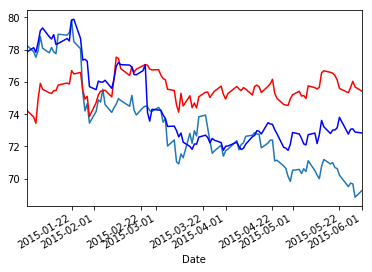

In [13]:
x1 = pdr.data.DataReader('PEP', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2015,6,1)).iloc[:, -1]
x2 = pdr.data.DataReader('F', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2015,6,1)).iloc[:, -1]
x3 = pdr.data.DataReader('TSLA', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2015,6,1)).iloc[:, -1]
x4 = pdr.data.DataReader('HPQ', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2015,6,1)).iloc[:, -1]
y = pdr.data.DataReader('PG', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2015,6,1)).iloc[:, -1]

slr_prediction2 = slr.params[0] + slr.params[1] * x1

mlr_prediction2 = mlr.params[0] + mlr.params[1] * x1+ mlr.params[2] * x2+ mlr.params[3] * x3+ mlr.params[4] * x4

y.plot()

slr_prediction2.plot(color='r')
mlr_prediction2.plot(color='b')

[-0.55012189 -0.32787571  0.87300552 -0.79291201  1.59402498 -0.95924433
  0.95566131 -0.10260877  0.05063183  0.87434079 -1.63155126 -0.49425227
 -1.72013858 -0.65854388 -1.34555409  2.17866595 -1.62356117 -0.35162606
  0.84902732 -0.51437714  0.43734749  0.99191821  0.3573918  -0.15699847
 -1.69834278 -1.34295256 -0.15325723  0.33405842 -0.38893267  0.7092961
 -0.00680216 -0.61115131  1.20993899 -1.51096323  0.78568195  1.44287007
  1.20195696 -0.62143168  1.43226001 -1.14087721 -0.41841548  2.15369926
 -0.34883015  0.37360622 -0.29192905 -0.52223632  0.86431252  0.32901744
  0.48631567  0.33163117  0.43266141 -0.85283477 -1.64301454  0.31817009
  0.82519987  0.57694461 -0.87894473 -0.104988    0.12302977 -0.35898056
 -0.74247031  0.21255824 -0.69034789  0.70128524 -0.14167819 -0.01102298
  0.15225615  1.45675769  0.30580118  0.33062875  0.37858202 -0.5196417
 -0.41326289 -0.55805926  0.2011015   0.19998619  0.3633311   0.81026676
  0.51243991 -0.46554552  0.2895754   0.6011835  -1.4

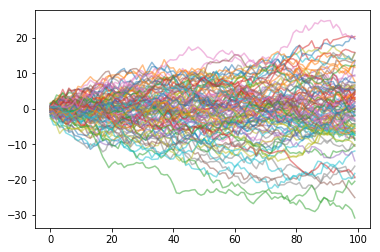

In [19]:
randos = [np.random.randn(100) for i in range(100)]
y = np.random.randn(100)
print(y)

randows = [[sum(rando[:i+1]) for i in range(100)] for rando in randos]
yw = [sum(y[:i+1]) for i in range(100)]

for i in range(100):
    plt.plot(randows[i], alpha=0.5)
    

linearly related walks out of 100 0


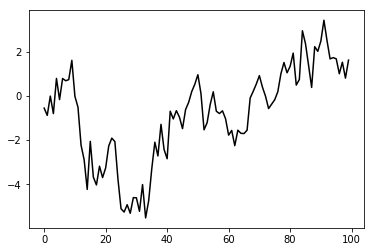

In [24]:
rs = [regression.linear_model.OLS(yw, x).fit().rsquared for x in randows]

rcount = 0
for i in range(100):
    if rs[i] > 0.8:
        rcount +=1
        plt.plot(randows[i], alpha=0.5)

print('linearly related walks out of 100', rcount)

plt.plot(yw, color='k')

72


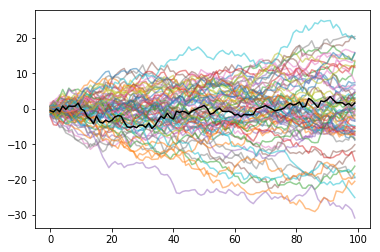

In [27]:
from scipy.stats import pearsonr

ps = [pearsonr(yw, x)[1] for x in randows]

pcount = 0

for i in range(100):
    if ps[i] < 0.05:
        pcount +=1
        plt.plot(randows[i], alpha=0.5)
               
print(pcount)
plt.plot(yw, color='k')
    

In [29]:
from statsmodels.tsa.stattools import adfuller

print(adfuller(yw)[1])

0.3199777082455766
